# Requirements

Ada beberapa kebutuhan sebelum melanjutkan ke beberapa proses selanjutnya, salah satunya menyiapkan kebutuhan yang diperlukan, seperti: platform, library, dataset dan lain sebagainya.

# Requirements

Ada beberapa kebutuhan sebelum melanjutkan ke beberapa proses selanjutnya, salah satunya menyiapkan kebutuhan yang diperlukan, seperti: platform, library, dataset dan lain sebagainya.

In [482]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## Library yang diperlukan

1. pandas

Pandas adalah perpustakaan perangkat lunak yang ditulis untuk bahasa pemrograman Python untuk manipulasi dan analisis data. Secara khusus, ia menawarkan struktur data dan operasi untuk memanipulasi tabel numerik dan deret waktu.

ketikkan ```pip install pandas``` untuk melakukan installasi

<br/>

2. Scikit-Learn

Scikit-learn, juga dikenal sebagai sklearn, adalah pustaka pembelajaran mesin dan pemodelan data sumber terbuka untuk Python. Ini menampilkan berbagai algoritma klasifikasi, regresi dan pengelompokan termasuk mesin vektor dukungan, hutan acak, peningkatan gradien, k-means dan DBSCAN, dan dirancang untuk berinteroperasi dengan perpustakaan Python, NumPy dan SciPy.

ketikkan ```pip install scikit-learn```

<br/>
3. Matplotlib

Matplotlib adalah library yang digunakan dalam bahasa pemrograman Python untuk menciptakan visualisasi data dengan grafis yang menarik dan informatif.
Seperti diketahui, visualisasi data merupakan aspek kunci dalam analisis karena bisa membantu memahami tren dan pola dalam data yang sedang kita kerjakan.

ketikkan ```pip install matplotlib``` untuk melakukan installasi

<br/>
4. Seaborn

Seaborn adalah pustaka visualisasi data Python berdasarkan matplotlib . Seaborn menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.

ketikkan ```pip install seaborn``` untuk melakukan installasi

In [483]:
# Memuat Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/firmansyahken/datasets/main/tb.csv")
dataset.head()

,UMUR,JENIS KELAMIN,KECAMATAN,FOTO TORAKS,STATUS HIV,RIWAYAT DIABETES,HASIL TCM,LOKASI ANATOMI (target/output)
0,17,P,AROSBAYA,Positif,Negatif,Tidak,Tidak dilakukan,Paru
1,19,P,KONANG,Positif,Negatif,Tidak,Tidak dilakukan,Paru
2,37,P,MODUNG,Positif,Negatif,Tidak,Tidak dilakukan,Paru
3,62,P,KAMAL,Positif,Negatif,Tidak,Tidak dilakukan,Paru
4,25,P,MODUNG,Tidak dilakukan,Negatif,Tidak,Tidak dilakukan,Ekstra paru


## Dataset

Untuk dataset sendiri, kita mengambilnya dengan cara load data raw pada github. Dataset tersebut sebelumnya sudah kita upload pada github, agar memudahkan untuk diakses dimana saja dan kapan saja

# Data preprocessing

Sebelum kita olah lebih lanjut data yang telah kita dapatkan sebelumnya, sebaiknya kita normalisasikan data terlebih dahulu agar performa dari model dapat berjalan dengan baik serta akurasi dapat menjadi lebih bagus.

Data preprocessing sendiri ialah merupakan serangkaian langkah dan proses yang dilakukan untuk membersihkan, mengubah, dan mempersiapkan data mentah sebelum data tersebut dimasukkan ke dalam model atau analisis lebih lanjut. Tujuan utama dari data preprocessing adalah untuk memastikan bahwa data yang digunakan untuk analisis atau modelisasi adalah yang terbaik, paling tepat, dan paling relevan.

In [484]:
# Hapus attribute yang tidak digunakan
dataset = dataset.drop(columns=['KECAMATAN'])
dataset

,UMUR,JENIS KELAMIN,FOTO TORAKS,STATUS HIV,RIWAYAT DIABETES,HASIL TCM,LOKASI ANATOMI (target/output)
0,17,P,Positif,Negatif,Tidak,Tidak dilakukan,Paru
1,19,P,Positif,Negatif,Tidak,Tidak dilakukan,Paru
2,37,P,Positif,Negatif,Tidak,Tidak dilakukan,Paru
3,62,P,Positif,Negatif,Tidak,Tidak dilakukan,Paru
4,25,P,Tidak dilakukan,Negatif,Tidak,Tidak dilakukan,Ekstra paru
...,...,...,...,...,...,...,...
980,53,L,Negatif,Tidak diketahui,Tidak,Tidak dilakukan,Ekstra paru
981,17,P,Negatif,Tidak diketahui,Tidak,Tidak dilakukan,Ekstra paru
982,16,L,Negatif,Tidak diketahui,Tidak,Tidak dilakukan,Ekstra paru
983,69,P,Negatif,Tidak diketahui,Tidak,Tidak dilakukan,Ekstra paru


- Menghapus kolom yang tidak diperlukan

Disini kolom yang tidak kami perlukan adalah kolom kecamatan, jadi disini kami drop dengan cara memanggil method drop yang disediakan oleh pandas lalu pada argument drop masukan kolom atau identifikasi kolom apa yang ingin dihapus.
Pastikan nama kolom sesuai dengan dataset yang digunakan

In [485]:
# Check missing value
print(dataset['UMUR'].isna())
print(dataset['JENIS KELAMIN'].isnull())
print(dataset['FOTO TORAKS'].isnull())
print(dataset['STATUS HIV'].isnull())
print(dataset['RIWAYAT DIABETES'].isnull())
print(dataset['HASIL TCM'].isnull())
print(dataset['LOKASI ANATOMI (target/output)'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: UMUR, Length: 985, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: JENIS KELAMIN, Length: 985, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: FOTO TORAKS, Length: 985, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: STATUS HIV, Length: 985, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: RIWAYAT DIABETES, Length: 985, dtype: bool
0      False
1      False
2      False
3      False
4      False
 

- Cek Missing Value

Cek data yang hilang, disini ada beberapa data yang hilang dengan value "Tidak dilakukan" dan "Tidak diketahui". Nilai tersebut kami anggap sebuah data hilang yang simpang siur karena tidak ditemukan hasil nilai sebenarnya.

Untuk melakukan pengecekan missing value disini, kita menggunakan method yang disediakan oleh pandas, yaituL isna atau isnull.
Kedua metode isna() dan isnull() memiliki tujuan yang sama dalam Pandas, yaitu untuk mendeteksi nilai yang hilang (NaN). Keduanya dapat digunakan secara bergantian tanpa perbedaan yang signifikan dalam penggunaan. Pilihan penggunaan antara isna() atau isnull() lebih kepada preferensi atau gaya penulisan kode.

Hasil yang didapat adalah semua data false atau tidak ada data yang hilang, padahal terdapat nilai "tidak diketahui" dan "tidak dilakukan" yang kami anggap sebagai missing value. Kenapa hal ini dapat terjadi, kenapa python menganggapnya sebagai bukan data yang hilang!. Itu karena isna() dan isnull() hanya mendeteksi nilai yang kosong (null), sedangkan "Tidak dilakukan" dan "Tidak diketahui" bukanlah termasuk nilai kosong.

In [486]:
missing_value = ['Tidak dilakukan', 'Tidak diketahui']
dataset['FOTO TORAKS'].replace(missing_value[0], pd.NA, inplace=True)
dataset['STATUS HIV'].replace(missing_value[1], pd.NA, inplace=True)
dataset['RIWAYAT DIABETES'].replace(missing_value[1], pd.NA, inplace=True)
dataset['HASIL TCM'].replace(missing_value[0], pd.NA, inplace=True)

Maka solusinya adalah kita harus replace terlebih dahulu string atau nilai kolom yang di dalamnya mengandung kata "Tidak dilakukan" dan "Tidak diketahui" menjadi nilai NA menggunakan pandas.

In [487]:
# Check persentase missing value tiap attribute
persentase = dataset.isnull().mean() * 100

Untuk menampilkan persentase disini kami menggunakan method mean() pada pandas, dimana mean sendiri merupakan nilai rata-rata. Mean disini merupakan nilai rata-rata isnull() atau data yang hilang pada dataset, lalu dikalikan dengan 100 sebagai bentuk representase persentase

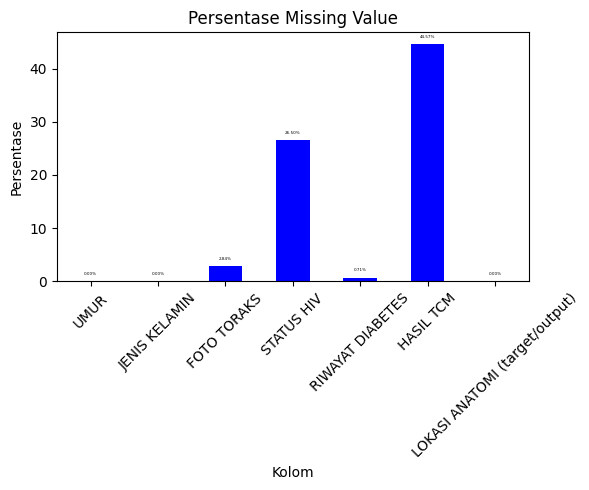

In [488]:
plt.figure(figsize=(6, 5))
persentase.plot(kind='bar', color='blue')

# Menambahkan label dan judul
plt.xlabel('Kolom')
plt.ylabel('Persentase')
plt.title('Persentase Missing Value')

# Menampilkan nilai persentase di atas batang
for index, value in enumerate(persentase):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tampilkan diagram batang persentase dengan menggunakan library matplotlib

In [489]:
# Normalisasi Data
min_umur = dataset['UMUR'].min()
max_umur = dataset['UMUR'].max()
dataset['UMUR'] = (dataset['UMUR'] - min_umur) / (max_umur - min_umur)
dataset['JENIS KELAMIN'] = dataset['JENIS KELAMIN'].replace({'P': 0, 'L': 1})
dataset['FOTO TORAKS'] = dataset['FOTO TORAKS'].replace({'Negatif': 0, 'Positif': 1})
dataset['STATUS HIV'] = dataset['STATUS HIV'].replace({'Negatif': 0, 'Positif': 1})
dataset['RIWAYAT DIABETES'] = dataset['RIWAYAT DIABETES'].replace({'Tidak': 0, 'Ya': 1})
dataset['HASIL TCM'] = dataset['HASIL TCM'].replace({'Rif resisten': 2, 'Negatif': 0, 'Rif Sensitif': 1})
dataset['LOKASI ANATOMI (target/output)'] = dataset['LOKASI ANATOMI (target/output)'].replace({'Paru': 1, 'Ekstra paru': 0})

- Normalisasi Data

Disini kami mengubah variabel kategorikal menjadi biner atau 0 dan 1 karena, merepresentasikan kategori atau label yang bersifat diskrit.
Dan untuk data umur sendiri kami menggunakan minmax skalar. Normalisasi ini berguna untuk mengubah skala data sehingga data memiliki distribusi yang lebih seragam dan dapat membantu meningkatkan kinerja beberapa model machine learning yang sensitif terhadap skala data.

In [490]:
# Mengisi missing value dengan modus
dataset['FOTO TORAKS'].fillna(dataset['FOTO TORAKS'].mode()[0], inplace=True)
dataset['STATUS HIV'].fillna(dataset['STATUS HIV'].mode()[0], inplace=True)
dataset['RIWAYAT DIABETES'].fillna(dataset['RIWAYAT DIABETES'].mode()[0], inplace=True)
dataset['HASIL TCM'].fillna(dataset['HASIL TCM'].mode()[0], inplace=True)

- Imputasi

Untuk mengisi data yang hilang disini kami menggunakan metode modus (nilai yang paling banyak muncul), disini kami menggunakan method fillna() dimana method tersebut merupakan method yang disediakan pandas untuk mengisi data yang hilang atau null. Lalu kami isi dengan mode() dimana mode disini merupakan modus.

In [491]:
dataset

,UMUR,JENIS KELAMIN,FOTO TORAKS,STATUS HIV,RIWAYAT DIABETES,HASIL TCM,LOKASI ANATOMI (target/output)
0,0.177778,0,1,0,0,1,1
1,0.200000,0,1,0,0,1,1
2,0.400000,0,1,0,0,1,1
3,0.677778,0,1,0,0,1,1
4,0.266667,0,1,0,0,1,0
...,...,...,...,...,...,...,...
980,0.577778,1,0,0,0,1,0
981,0.177778,0,0,0,0,1,0
982,0.166667,1,0,0,0,1,0
983,0.755556,0,0,0,0,1,0


Maka data yang sudah dinormalisasi akan seperti diatas

# Modeling

Modeling dalam konteks analisis data atau machine learning mengacu pada proses pembuatan dan penggunaan model matematis atau komputasional untuk mewakili atau memodelkan sebuah fenomena atau proses dari data yang ada. Tujuan utama dari modeling adalah untuk memahami, menjelaskan, atau memprediksi yang diamati berdasarkan data yang dikumpulkan.

In [492]:
#  Memisahkan fitur dan target
X = dataset.drop(columns=['LOKASI ANATOMI (target/output)'])
y = dataset['LOKASI ANATOMI (target/output)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

- Data Train & Test

Disini kami membagi menjadi 20% data testing dan sisanya data testing (80%)
Kami membagi menjadi test_size=0.2 dengan shuffle=True, dimana shuffle disini merupakan parameter untuk melakukan pengacakan data, karena disini bernilai True maka nantinya data yang akan ditrain dan di test akan diacak (shuffle).

X = merupakan data fitur dan,
y = merupakan target class atau output yang diharapkan

In [493]:
# Inisialisasi model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

y_predict = perceptron.predict(X_test)

- Inisialisasi Model

Model yang digunakan disini adalah perceptron dimana model ini sudah tersedia di library Sklearn.
Untuk mengimport model kita bisa gunakan perintah berikut:

```from sklearn.linear_model import Perceptron```

Untuk memulai pelatihan model, bisa saja langsung gunakan method fit() dengan dua argumen yaitu: X_train (fitur) dan y_train (Target class / output)
dimana pelatihan model ini nantinya hasil akan dilatih supaya hasil prediksi sama seperti target class (y_train)

# Evaluasi Model

Evaluasi model adalah proses untuk menilai kinerja model machine learning yang telah dibangun. Tujuan utama dari evaluasi model adalah untuk memastikan bahwa model tersebut bekerja dengan baik pada data yang belum pernah dilihat sebelumnya (data uji atau data baru) dan memberikan hasil yang akurat dan andal. Evaluasi yang baik membantu kita memahami sejauh mana model dapat diandalkan dalam prediksi atau pengambilan keputusan.

In [494]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_predict)
# Masukkan nilai y_test (Target class) dan y_predict (Hasil prediksi)
print (f"Iteration: {perceptron.n_iter_}")
# Menampilkan berapa jumlah iterasi yang dilakukan hingga model selesai berlatih
print (f"Accuray: {accuracy}")
# Menampilkan akurasi

confusion = confusion_matrix(y_test, y_predict)
# Panggil fungsi confusion_matrix
# Masukkan nilai y_test (Target class) dan y_predict (Hasil prediksi)
print("Confusion Matrix:")
print(confusion)

Iteration: 18
Accuray: 0.9949238578680203
Confusion Matrix:
[[99  1]
 [ 0 97]]


Untuk hasil evaluasi sendiri disini terdapat nilai akurasi dan confusion matrix, dimana confusion matrix sendiri ialah alat yang digunakan untuk mengukur kinerja model klasifikasi dengan membandingkan prediksi yang dibuat oleh model dengan nilai sebenarnya. Matriks ini menyajikan hasil dalam bentuk tabel yang memvisualisasikan jumlah prediksi yang benar dan salah untuk setiap kelas.

Disini sklearn sudah juga terdapat library untuk melakukan evaluasi model yang bisa kita import dengan cara berikut:

```from sklearn.metrics import accuracy_score, confusion_matrix```

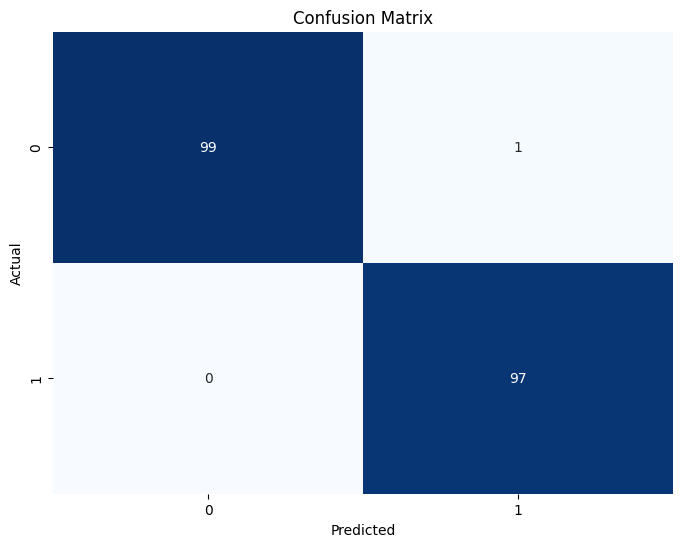

In [495]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Menyajikan Confusion Matrix dalam bentuk visual

Untuk melakukan plotting atau visualisasi hasil dari confusion matrix, disini kami menggunakan libary seaborn, karena mudah untuk digunakan serta desain visualnya sangat simpel dan elegan

In [496]:
umur = 25
jenis_kelamin = 1
foto_toraks = 0
status_hiv = 1
riwayat_diabetes = 0
hasil_tcm = 1

umur = (umur - min_umur) / (max_umur - min_umur)

new_data = pd.DataFrame([[
    umur,
    jenis_kelamin,
    foto_toraks,
    status_hiv,
    riwayat_diabetes,
    hasil_tcm
]], columns=['UMUR', 'JENIS KELAMIN', 'FOTO TORAKS', 'STATUS HIV', 'RIWAYAT DIABETES', 'HASIL TCM'])

y_pred = perceptron.predict(new_data)

if y_pred[0] == 1:
  print ("Paru")
else:
  print ("Ekstra Paru")

Ekstra Paru
